# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

<font color=yellow>TODO: 1. export notebook to html 2. do the writeup 3. go over rubrik</font>
> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

---
## Step 0: Load The Data
Load the German Traffic Signs Dataset 

In [106]:
# Load pickled data
import pickle

# file paths to saved the training and testing data
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Basic Summary of the Dataset

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# The shape of an traffic sign image
image_shape = X_train[0].shape  # shape of first sample  

# How many unique classes/labels there are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Dataset Exploration

#### Label Names

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import csv

with open('./signnames.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        print(row)

['ClassId', 'SignName']
['0', 'Speed limit (20km/h)']
['1', 'Speed limit (30km/h)']
['2', 'Speed limit (50km/h)']
['3', 'Speed limit (60km/h)']
['4', 'Speed limit (70km/h)']
['5', 'Speed limit (80km/h)']
['6', 'End of speed limit (80km/h)']
['7', 'Speed limit (100km/h)']
['8', 'Speed limit (120km/h)']
['9', 'No passing']
['10', 'No passing for vehicles over 3.5 metric tons']
['11', 'Right-of-way at the next intersection']
['12', 'Priority road']
['13', 'Yield']
['14', 'Stop']
['15', 'No vehicles']
['16', 'Vehicles over 3.5 metric tons prohibited']
['17', 'No entry']
['18', 'General caution']
['19', 'Dangerous curve to the left']
['20', 'Dangerous curve to the right']
['21', 'Double curve']
['22', 'Bumpy road']
['23', 'Slippery road']
['24', 'Road narrows on the right']
['25', 'Road work']
['26', 'Traffic signals']
['27', 'Pedestrians']
['28', 'Children crossing']
['29', 'Bicycles crossing']
['30', 'Beware of ice/snow']
['31', 'Wild animals crossing']
['32', 'End of all speed and passin

#### Class Distrubution
Plot class label histogram - dataset is biased due to some classes having few samples.
> We'll need to generate some fake deformed additional data to balance the classes later on.

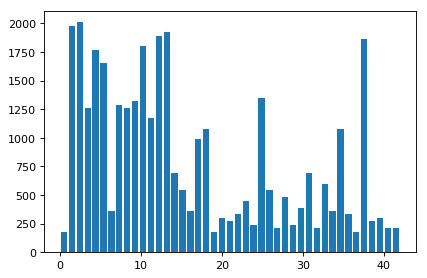

In [4]:
plt.figure(dpi=80)
plt.hist(y_train, n_classes,align='mid', rwidth=0.8)
plt.show()

> We can see the images are grouped and ordered - we'll need to shuffle the data

In [5]:
print(y_train[0:300])

[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31]


> Calculate the class label ranges in the training set, to easily explore further 

#### Image Exploration
> Some images are very dark - we'll need to normalize later to avoid intensity bias

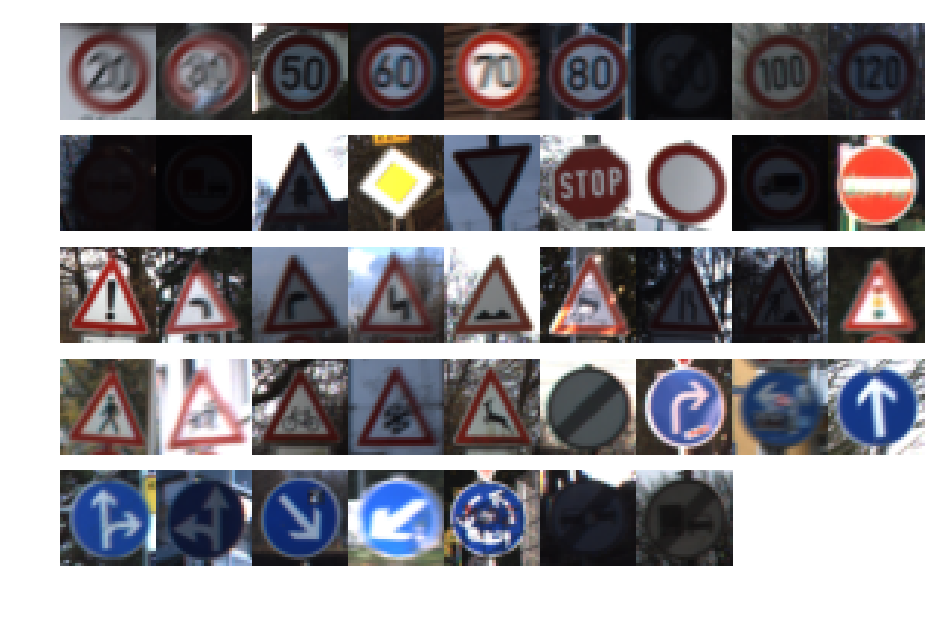

In [189]:
NUM_ROWS = 5
NUM_COLS = 9

smpl = {y_train[i]:i for i in range(len(y_train))}

fig, ax = plt.subplots(NUM_ROWS,NUM_COLS, dpi=160)
ax = ax.ravel()

for i in range(NUM_ROWS*NUM_COLS):
    if i < n_classes: 
        ax[i].axis('off')
        ax[i].imshow(X_train[smpl[i]])
    else:
        fig.delaxes(ax[i])
    
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)


### Priors

#### Dataset Origin
First, I've investigated the origins of the dataset - http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset. 
It looks like it was originally much more extensive, I'm guessing it was pre-processed by Udacity to fit students needs better.  

#### Non-local Information
There's an international convention for traffic signs and rules:
https://en.wikipedia.org/wiki/Vienna_Convention_on_Road_Signs_and_Signals#Road_signs

There's a lot of data there which can't be learned from the dataset: categories, borders, shapes, colors, etc.
One particulary important conclusion: signs differ between countries and regions in geometry and color. 
Consequentially, our classifier will be overfitted to the German convention.
Furthermore, there are signs which differ ONLY in one dimension such as chroma, intensity, geometry and sometimes even interpertation (e.g MPH vs KPH speed limit).
Therefore, while various dimensionality reduction and downsampling may vastly improve performance and accuracy (even in the test), for some theoretical real world usage it might be unwise to discard these data. 

<img src="https://i.kinja-img.com/gawker-media/image/upload/s--q_NFqGPk--/c_scale,f_auto,fl_progressive,q_80,w_800/tltf3upetxng0jeyboen.jpg" width="500" height="500" />

----

## Step 2: Design and Test a Model Architecture

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 


### Cleaning
The dataset seems to be very clean. I've tried to check for various faults to no avail - although didn't spend much time on it, so the check was very shallow.

### Imputation
We've seen the classes have an unbalanced sample quantity. We'll generate some by slightly deforming existing samples.
The deformation is just blurring. 

In [113]:
# calculate the sample ranges 
rngs = {i:np.argwhere(y_train==i).flatten() for i in range(n_classes)}    
counts = {i: len(rngs[i]) for i in range(n_classes)}
max_count = max([counts[i] for i in range(n_classes)])


tot_count = sum([max_count-counts[i] for i in range(n_classes)])
deformed=np.empty((tot_count,32,32,3), dtype=np.uint8)
deformed_labels = np.empty(tot_count, dtype=np.uint8)

last = 0
for i in range(n_classes):
    rnd = np.random.choice(rngs[i],size=max_count-counts[i])
    for r in rnd:
        if last%3 == 0:
            # blur the image
            deformed[last] = cv2.blur(X_train[r],(3,3))
        elif last%3 == 1:
            # rotate clockwise 5 degrees
            M = cv2.getRotationMatrix2D((16,16),5,1)
            deformed[last] = cv2.warpAffine(X_train[r],M,(32,32))
        elif last%3 == 2:
             # rotate counter-clockwise 5 degrees
            M = cv2.getRotationMatrix2D((16,16),-5,1)
            deformed[last] = cv2.warpAffine(X_train[r],M,(32,32))
        deformed_labels[last] = i
        last+=1
        
X_train = np.append(X_train,deformed,axis=0)
y_train = np.append(y_train,deformed_labels)
n_train = y_train.shape[0]

### Normalization
Global normalization is implemented as simplified whitening of each color channel:
$ x = {x - \hat{x} \over \sigma(x) }$ for every pixel x, across all samples

In [115]:
avg = np.mean(X_train,axis=0)
stddv = np.std(X_train,axis=0)
X_train = (X_train-avg)/stddv
X_valid = (X_valid-avg)/stddv
X_test = (X_test-avg)/stddv
print(X_train[0,:,:,0])

[[-0.35777602 -0.37318668 -0.50376501 ... -0.41784611 -0.31491005
  -0.31226122]
 [-0.3433704  -0.37216766 -0.53818056 ... -0.45945477 -0.31276146
  -0.32393139]
 [-0.48531609 -0.53895947 -0.81926045 ... -0.74766263 -0.5120031
  -0.48724547]
 ...
 [-0.37168832 -0.39922548 -0.63740718 ... -0.70507646 -0.43398248
  -0.37588408]
 [-0.2439398  -0.22917953 -0.38604333 ... -0.44836827 -0.24130366
  -0.23826927]
 [-0.22442808 -0.20958471 -0.32929147 ... -0.41066848 -0.25427905
  -0.26835212]]


Local normalization - not sure it's needed, unused for now

In [116]:
#         img = X_train[smpl[i]][:,:,0].astype(np.float32)/255.0
#         avgfilt = cv2.blur(img,(5,5))
#         sqrfilt = cv2.blur(img**2,(5,5))
#         stdfilt = cv2.pow(sqrfilt-avgfilt**2,0.5)
#         img = img-avgfilt
#         img = np.where(stdfilt>1,img/stdfilt,img)

### Dimensionality Reduction
Judging by the images, red and blue hold the most information. Yellow shows up once, but that sign has unique geometry anyway. Green is mostly background vegetation, doesn't show up on the signs themselves.
We show, by way of principal component analysis, the red color channel contains the vast majority of information, therefore we discard the green and blue channels.


In [118]:
img = np.reshape(X_train.T,(3,-1))  # np.cov requires a 2d array
# calc eigenvalues and vectors via covariance matrix
eigval, eigvec = np.linalg.eig(np.cov(img))

print(eigval)
print(eigvec)

[2.83832818 0.14630581 0.01536604]
[[ 0.56821171  0.74768469  0.34366125]
 [ 0.59034048 -0.0794419  -0.8032354 ]
 [ 0.57326571 -0.65928491  0.48652835]]


In [119]:
# drop the green,blue channels and reshape to fit NN expected shape
X_train = np.reshape(X_train[:,:,:,0],(-1,32,32,1))
X_valid = np.reshape(X_valid[:,:,:,0],(-1,32,32,1))
X_test = np.reshape(X_test[:,:,:,0],(-1,32,32,1))

### Randomization
Shuffle the training dataset

In [120]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [121]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 1
BATCH_SIZE = 128

In [248]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 0: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(6))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b
    
    # Activation.
    conv0 = tf.nn.relu(conv0)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6. 
    conv0 = tf.nn.max_pool(conv0, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    fc0    = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 256. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
     # Activation
    fc3    = tf.nn.relu(fc3)
    fc3    = tf.nn.dropout(fc3, keep_prob)
    
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits


In [249]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [250]:
rate = 0.01

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [251]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [252]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.510

EPOCH 2 ...
Validation Accuracy = 0.592

Model saved


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")